In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
spacing = np.concatenate([np.repeat(440, 12), 
                          np.repeat(660, 8),
                          np.repeat(880, 6), 
                          np.repeat(1056, 10),
                          np.repeat(1320, 8),
                          np.repeat(2640, 1)])

spacing = spacing * np.random.normal(1, .1, len(spacing), )

spacing

array([ 322.47939338,  402.02767793,  488.78876935,  438.47550016,
        456.62057924,  386.80067581,  364.77069409,  440.1526209 ,
        490.95513942,  491.70811156,  412.81041907,  400.47773412,
        667.68315756,  573.16334092,  782.51506991,  626.3101144 ,
        608.26980706,  688.52225254,  626.52916052,  793.01104452,
        952.11609564,  756.63653388,  977.03615293,  857.75499351,
        872.46616347,  748.43601409,  995.2441755 , 1141.41204941,
       1204.40784957,  886.1494358 , 1219.60536962, 1140.0150336 ,
       1022.57074658,  971.35289207, 1155.51255915,  951.03171122,
       1351.00580078, 1394.45714183, 1386.80106872, 1405.45576361,
       1368.55402937, 1279.33850378, 1464.61336356, 1285.0791434 ,
       2928.57924903])

In [3]:
k = 0.0025 # sigmoid exponent
L = 120    # sigmoid asymptote
b0 = 10    # sigmoid intercept

def eur_per_ft(spacing, k, L, b0):
    eur_per_ft = L / (1 + np.exp(-k * (spacing - 0))) - L/2 + b0
    return eur_per_ft
    

In [4]:
df = pd.DataFrame({'spacing': spacing})

df['spacing'] = df['spacing'].astype('float')

df['compl_bbl_per_ft'] = np.concatenate([np.repeat(45,6), np.repeat(33, 6), np.repeat(43, 8), np.repeat(42, 4), np.repeat(70, 2), 
               np.repeat(62, 3), np.repeat(45, 4), np.repeat(35, 3), np.repeat(45, 9)])

df['compl_bbl_per_ft'] = df['compl_bbl_per_ft'] + np.random.normal(1, 1, len(df))

df['compl_lbs_sd_per_ft'] = df['compl_bbl_per_ft'] * np.random.choice([30, 40, 40, 40, 50], len(df))


df['eur_per_ft'] = df.apply(lambda x: eur_per_ft(x['spacing'], k, L, b0), axis=1)
df['eur_per_ft'] = (1 - ((df['compl_lbs_sd_per_ft'] / df['compl_bbl_per_ft'] - 40) / 40) * (.08/.25)) * df['eur_per_ft']

df['log_eurft'] = np.log(df['eur_per_ft'])
df['log_eurft'] = df['log_eurft'] + np.random.normal(0, df['log_eurft'].std()/10, len(df))



df

,spacing,compl_bbl_per_ft,compl_lbs_sd_per_ft,eur_per_ft,log_eurft
0,322.479393,47.335902,1893.436072,32.955860,3.509947
1,402.027678,46.092838,1843.713501,37.846489,3.630751
2,488.788769,46.440723,1857.628931,42.689246,3.720028
3,438.475500,45.711826,2285.591317,36.749802,3.640177
4,456.620579,46.069796,1842.791824,40.955725,3.735699
5,386.800676,45.301423,1812.056901,36.942576,3.614988
6,364.770694,34.419911,1376.796434,35.607312,3.545082
7,440.152621,34.096709,1363.868376,40.039791,3.677515
8,490.955139,34.988461,1749.423037,39.379061,3.704401
9,491.708112,33.437037,1337.481486,42.842900,3.741343


In [5]:
df['eur_per_ft'] = np.exp(df['log_eurft'] + np.random.normal(0, df['log_eurft'].std() / 10, len(df)))

In [6]:
df['log_eurft'].std()

0.2288136570140557

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 5.0)

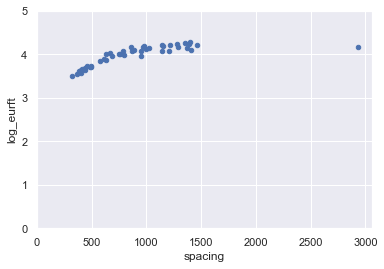

In [7]:
df.plot.scatter(x='spacing', y='log_eurft')
plt.xlim(0,)
plt.ylim(0,5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 73.97007286903175)

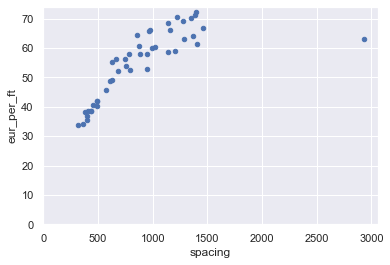

In [8]:
df.plot.scatter(x='spacing', y='eur_per_ft')
plt.xlim(0,)
plt.ylim(0,)

<AxesSubplot:xlabel='log_eurft', ylabel='Count'>

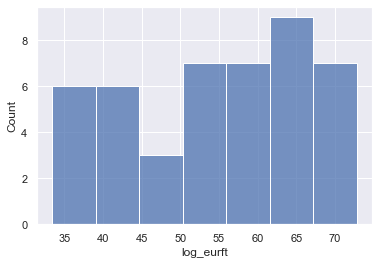

In [9]:
sns.histplot(np.exp(df['log_eurft']))

In [15]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(bootstrap=True, random_state=3)

X = df.drop(['eur_per_ft', 'log_eurft'], axis=1)
y = df['eur_per_ft']

regr.fit(X, y)

RandomForestRegressor(random_state=3)

In [16]:
pred = regr.predict(X)

df_compare = df.copy()
df_compare['pred'] = pred

df_compare

,spacing,compl_bbl_per_ft,compl_lbs_sd_per_ft,eur_per_ft,log_eurft,pred
0,322.479393,47.335902,1893.436072,33.683349,3.509947,34.813161
1,402.027678,46.092838,1843.713501,36.672336,3.630751,36.790671
2,488.788769,46.440723,1857.628931,41.881850,3.720028,41.089661
3,438.475500,45.711826,2285.591317,38.641998,3.640177,38.738338
4,456.620579,46.069796,1842.791824,40.526835,3.735699,39.885938
5,386.800676,45.301423,1812.056901,38.049369,3.614988,37.450484
6,364.770694,34.419911,1376.796434,34.173972,3.545082,35.392338
7,440.152621,34.096709,1363.868376,38.384889,3.677515,38.583810
8,490.955139,34.988461,1749.423037,40.149755,3.704401,40.329647
9,491.708112,33.437037,1337.481486,41.831620,3.741343,41.153233


(0.0, 73.97007286903175)

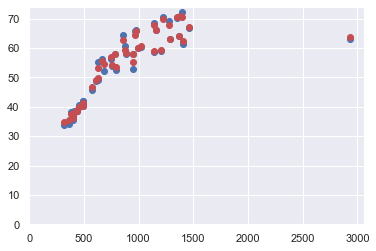

In [17]:
plt.scatter(x=df_compare['spacing'], y=df_compare['eur_per_ft'])
plt.scatter(df_compare['spacing'], df_compare['pred'], c='r')

plt.xlim(0,)
plt.ylim(0,)

In [18]:
regr.feature_importances_

array([0.93421618, 0.02041547, 0.04536835])